In [24]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [258]:
data = pd.read_parquet('../database/chb02_raw_eeg_128.parquet')
data.filename.unique()

array(['chb02_01.edf', 'chb02_02.edf', 'chb02_03.edf', 'chb02_04.edf',
       'chb02_05.edf', 'chb02_06.edf', 'chb02_07.edf', 'chb02_08.edf',
       'chb02_09.edf', 'chb02_10.edf', 'chb02_11.edf', 'chb02_12.edf',
       'chb02_13.edf', 'chb02_14.edf', 'chb02_15.edf', 'chb02_16+.edf',
       'chb02_16.edf', 'chb02_17.edf', 'chb02_18.edf'], dtype=object)

In [96]:
230400/3600

64.0

In [191]:
data.query("filename == 'chb03_01.edf'")

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,T8-P8,P8-O2,FZ-CZ,CZ-PZ,T7-FT9,FT9-FT10,FT10-T8,type,PatID,filename
0,42.002441,19.340660,6.056166,-14.261294,31.062271,-16.996338,33.406593,5.665446,0.195360,-48.644688,...,2.148962,-6.056166,-23.247864,26.764347,-5.665446,-10.354091,-13.089133,seizure,chb03,chb03_01.edf
4,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,-0.195360,0.195360,0.195360,seizure,chb03,chb03_01.edf
8,1.758242,-0.586081,0.195360,0.586081,2.930403,-0.976801,0.195360,-0.195360,-0.976801,0.976801,...,-0.586081,1.367521,0.195360,0.195360,-0.976801,0.195360,1.758242,seizure,chb03,chb03_01.edf
12,-7.228327,-2.539683,-16.996338,-3.321123,-12.698413,-2.930403,-6.837607,-6.837607,3.711844,-10.744811,...,-5.665446,-6.446887,-4.884005,-4.102564,2.539683,6.056166,-0.976801,seizure,chb03,chb03_01.edf
16,-14.652015,-7.619048,-32.625153,3.711844,-11.526252,-4.884005,-15.042735,-18.559219,4.493285,4.102564,...,-7.228327,-11.916972,-0.586081,-7.619048,9.181930,10.354091,1.758242,seizure,chb03,chb03_01.edf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921580,-14.261294,35.750916,20.903542,22.075703,-2.539683,48.253967,18.168499,0.586081,22.075703,2.539683,...,20.903542,25.201466,24.420025,16.605618,-18.168499,-8.009768,0.976801,seizure,chb03,chb03_01.edf
921584,0.195360,34.969475,20.122101,23.638584,38.876678,34.188034,4.884005,0.195360,38.876678,7.619048,...,31.843712,21.684982,44.346764,-0.976801,-12.307693,-1.758242,10.354091,seizure,chb03,chb03_01.edf
921588,5.274725,15.824176,3.711844,20.903542,45.128204,11.916972,-8.009768,-2.539683,18.559219,22.857143,...,24.420025,7.228327,37.313797,-13.870574,-4.493285,-5.665446,19.340660,seizure,chb03,chb03_01.edf
921592,14.261294,-6.446887,-5.274725,-5.274725,20.903542,2.539683,-16.605618,-9.963370,-20.903542,25.982906,...,6.446887,0.586081,22.466423,-6.056166,-7.228327,-9.181930,9.572650,seizure,chb03,chb03_01.edf


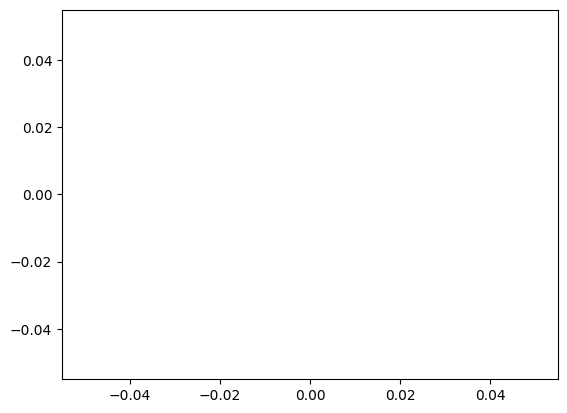

In [27]:
plt.plot(data.query("filename == 'chb01_20.edf'")['FP1-F7'])

In [16]:
115200/3600

32.0

In [26]:
3600*32

115200

## Creando la variable objetivo

0: Normal


1: PreEpilepsia


2: Epilepsia


3: PostEpilepsia

In [20]:
DataAnotation = pd.read_excel("data/df_annotation_full.xlsx")
DataAnotation.head()

,Unnamed: 0,type,PatID,filename,seizure_id,seizure_start,seizure_end,rec_duration,seizure_duration
0,2,seizure,chb01,chb01_03.edf,1,2996,3036,3600,40
1,3,seizure,chb01,chb01_04.edf,1,1467,1494,3600,27
2,14,seizure,chb01,chb01_15.edf,1,1732,1772,3600,40
3,15,seizure,chb01,chb01_16.edf,1,1015,1066,3600,51
4,17,seizure,chb01,chb01_18.edf,1,1720,1810,3600,90


In [53]:
f = px.histogram(DataAnotation.query("seizure_duration > 0").seizure_duration)#, points="all")
f.update_layout(title = 'seizure_duration distribution')
f.show()

In [38]:
f = px.histogram(DataAnotation.query("rec_duration > 0"), x = 'rec_duration', color = 'type')
f.update_layout(title = 'rec_duration distribution')
f.show()

In [48]:
DataAnotation.type.describe()

count        743
unique         2
top       normal
freq         545
Name: type, dtype: object

In [46]:
f = px.bar(y = [743-545, 545], x = ['seizure', 'normal'])
f.update_layout(title = 'rec_duration distribution')
f.show()

In [52]:
DataAnotation.rec_duration.unique()

array([ 3600,  2325,  2663,   600,   959,  3606, 14423,  9536, 14400,
       14398,  7496,  4832, 14420, 14418, 13732, 14425, 10684, 14406,
       14427, 14403,  5613,  5823,  3610, 13261,  7928,  3030,  3726,
       14411,  4920,  4660, 12060,  3623, 14399,  5700,  8023, 14415,
       14405, 14421, 13591,   974,  7200,  7212,  7218,  7213,  7221,
        7220,  2859,  3598,  3624,  3612,  3611,  2431,  3616,  3625,
        3609,  3602,  2274,  3334,  3469,  2167,  3618,   742,  2964,
        2990,  3599, 14426, 10342,  7486,  2560, 12587,  5009,  1067],
      dtype=int64)

In [63]:
DataAnotation.head()

,Unnamed: 0,type,PatID,filename,seizure_id,seizure_start,seizure_end,rec_duration,seizure_duration
0,2,seizure,chb01,chb01_03.edf,1,2996,3036,3600,40
1,3,seizure,chb01,chb01_04.edf,1,1467,1494,3600,27
2,14,seizure,chb01,chb01_15.edf,1,1732,1772,3600,40
3,15,seizure,chb01,chb01_16.edf,1,1015,1066,3600,51
4,17,seizure,chb01,chb01_18.edf,1,1720,1810,3600,90


In [234]:
retrieve = {0:'normal', 1:'pre', 2:'seizure', 3:'pos'}
y = []
Ref = []
Seizure = []
Frec = 64
segMargin = 30 * Frec
for i in range(DataAnotation.shape[0]):
    filename = DataAnotation.iloc[i, :].filename
    Temp = DataAnotation.iloc[i, :]* Frec
    Vec = np.zeros(Temp.rec_duration, dtype = np.int32)
    Ref.append(filename)
    
    if Temp.seizure_duration > 0:
        Seizure.append(True)
        
        before = Temp.seizure_start - segMargin
        before = 0 if before < 0  else before
        
        Vec[before : Temp.seizure_start] = 1
        
        Vec[Temp.seizure_start:Temp.seizure_end] = 2
        
        after = Temp.seizure_end + segMargin + 1
        after = after if after <= Temp.rec_duration else Temp.rec_duration
        
        Vec[Temp.seizure_end +1 : after] = 3
        
    else:
        Seizure.append(False)
    
            
    y.append(Vec)

Ref = np.array(Ref)
Seizure = np.array(Seizure)

In [238]:
for r, c in zip(Ref[Seizure], np.where(np.array(Seizure) == True)[0]):
    print(r,c)

chb01_03.edf 0
chb01_04.edf 1
chb01_15.edf 2
chb01_16.edf 3
chb01_18.edf 4
chb01_21.edf 5
chb01_26.edf 6
chb02_16+.edf 42
chb02_16.edf 43
chb02_19.edf 44
chb03_01.edf 78
chb03_02.edf 79
chb03_03.edf 80
chb03_04.edf 81
chb03_34.edf 82
chb03_35.edf 83
chb03_36.edf 84
chb04_28.edf 116
chb04_05.edf 117
chb04_08.edf 118
chb04_28.edf 119
chb05_06.edf 159
chb05_13.edf 160
chb05_16.edf 161
chb05_17.edf 162
chb05_22.edf 163
chb06_01.edf 198
chb06_01.edf 199
chb06_04.edf 200
chb06_01.edf 201
chb06_04.edf 202
chb06_09.edf 203
chb06_10.edf 204
chb06_13.edf 205
chb06_18.edf 206
chb06_24.edf 207
chb07_12.edf 219
chb07_13.edf 220
chb07_19.edf 221
chb08_02.edf 238
chb08_05.edf 239
chb08_11.edf 240
chb08_13.edf 241
chb08_21.edf 242
chb09_08.edf 258
chb09_06.edf 259
chb09_08.edf 260
chb09_19.edf 261
chb10_12.edf 278
chb10_20.edf 279
chb10_27.edf 280
chb10_30.edf 281
chb10_31.edf 282
chb10_38.edf 283
chb10_89.edf 284
chb11_82.edf 303
chb11_92.edf 304
chb11_99.edf 305
chb12_27.edf 338
chb12_29.edf 339
chb

In [259]:
ind = 43
#y[ind]
Ref[ind]

'chb02_16.edf'

In [260]:
y[ind][y[ind] ==2].shape

(5248,)

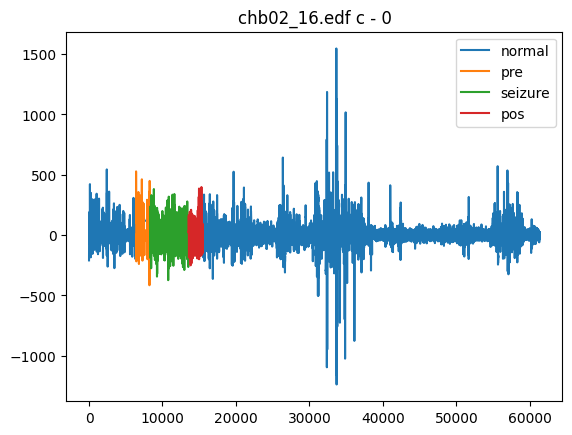

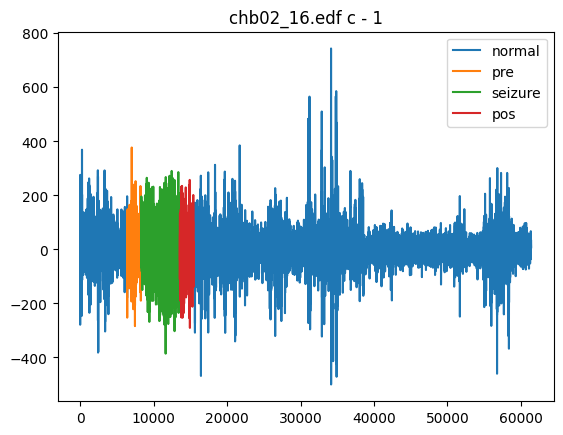

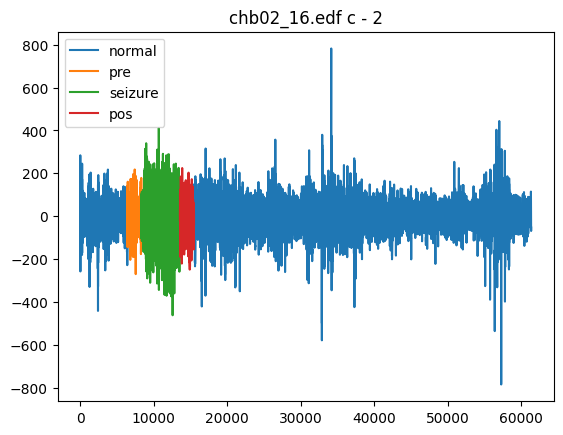

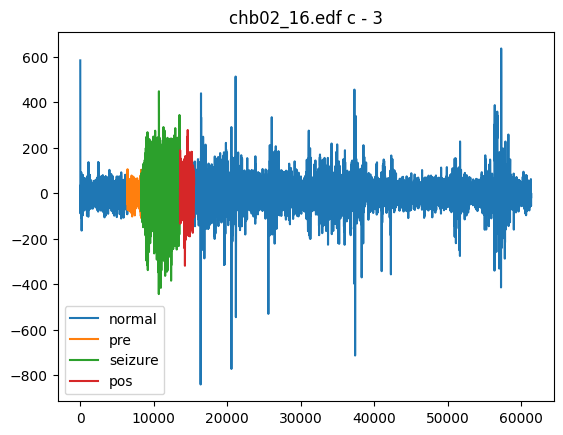

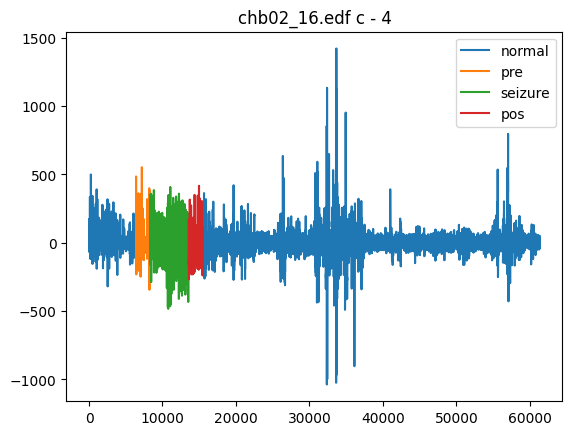

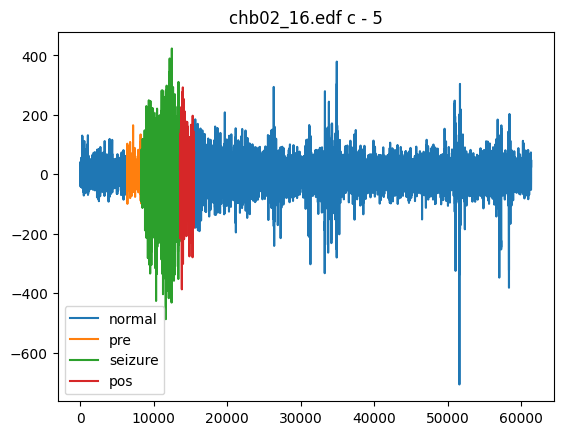

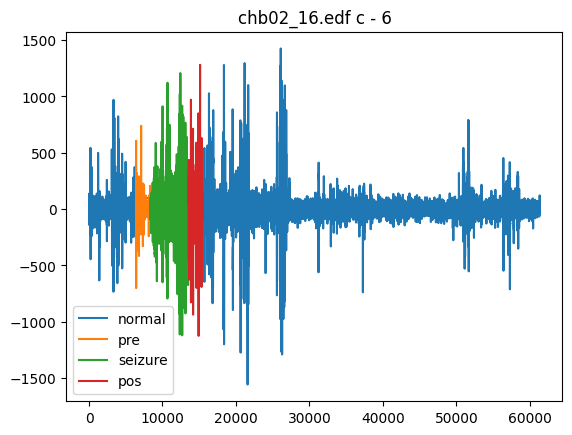

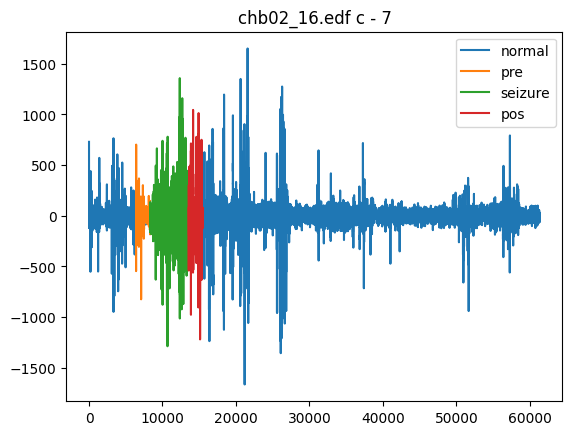

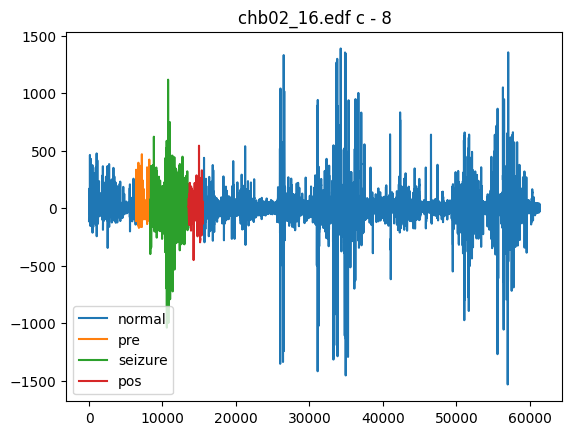

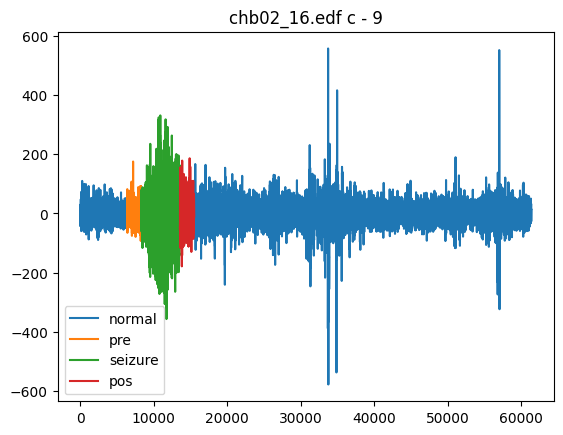

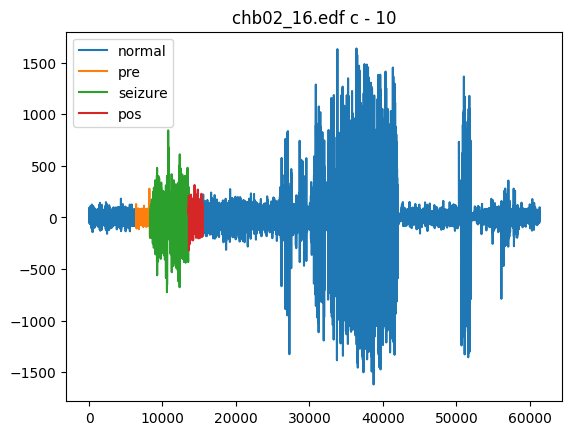

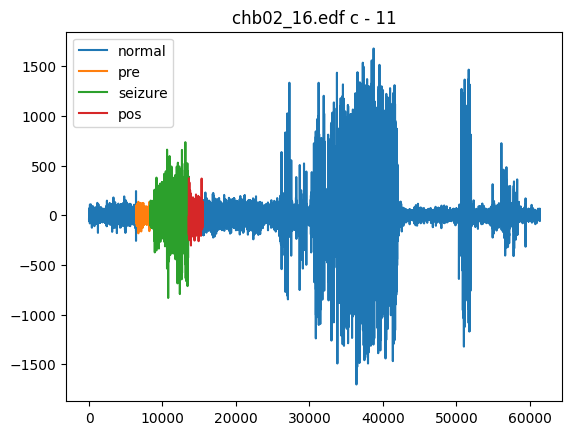

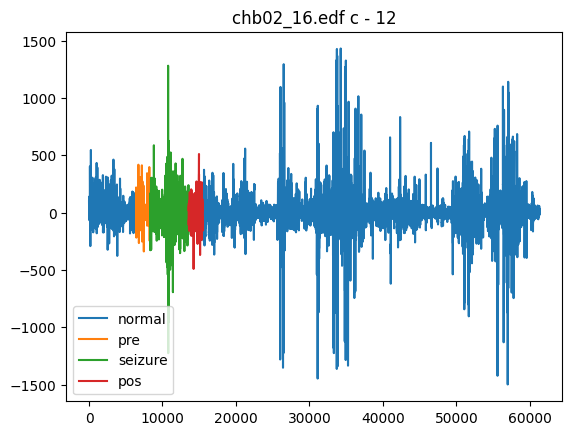

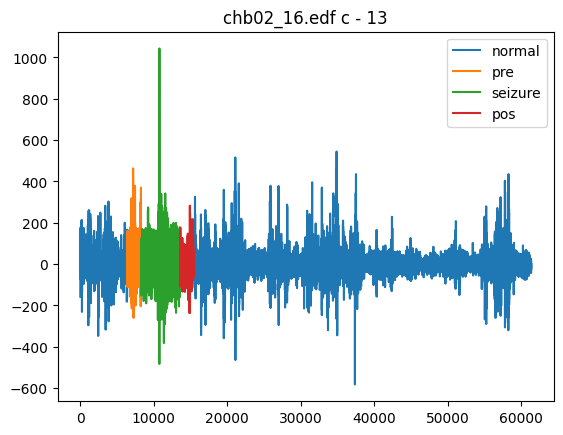

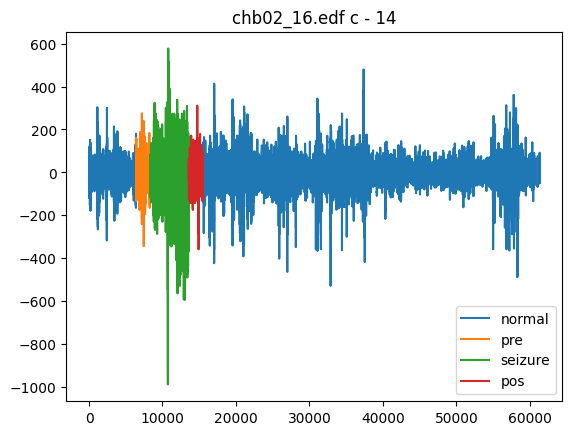

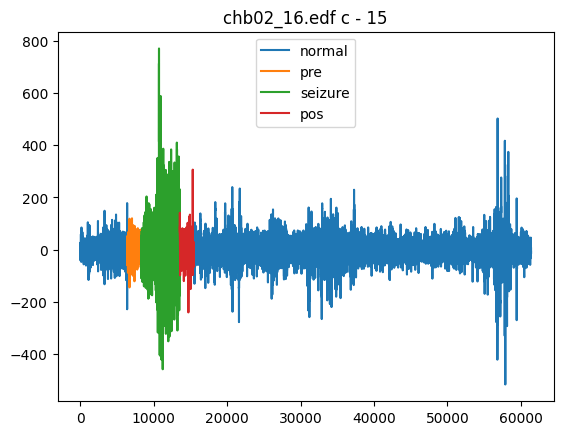

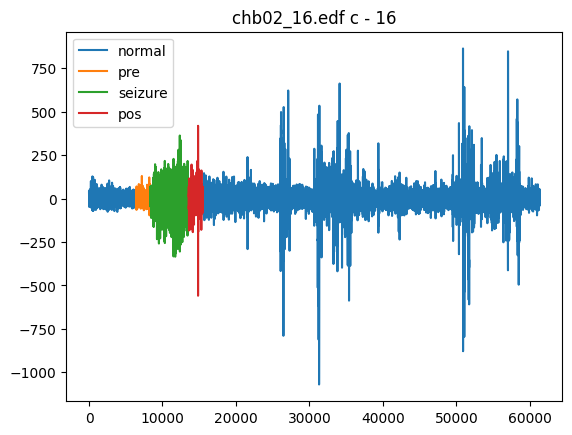

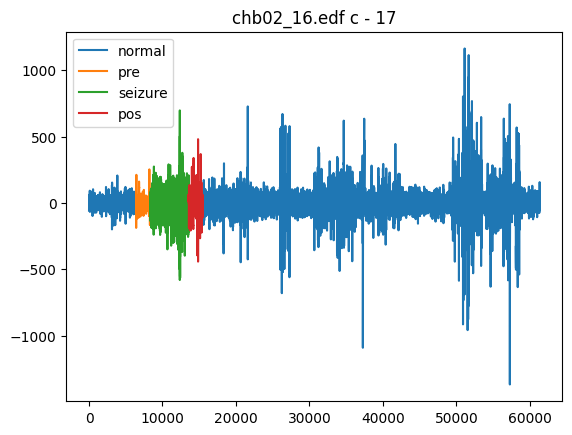

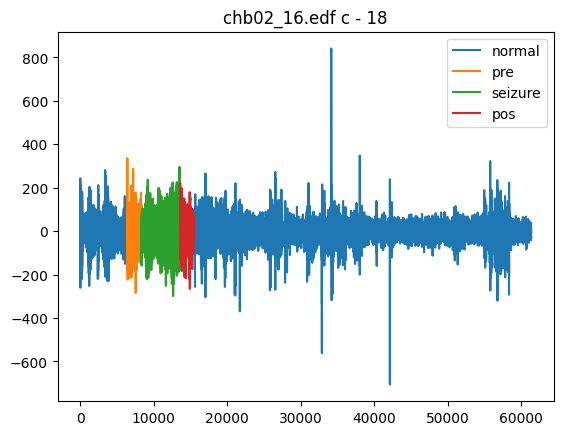

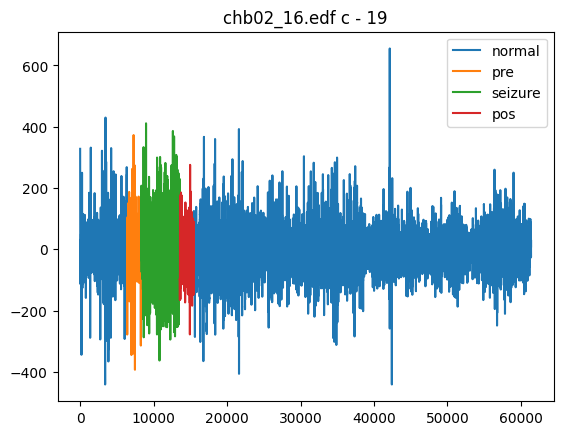

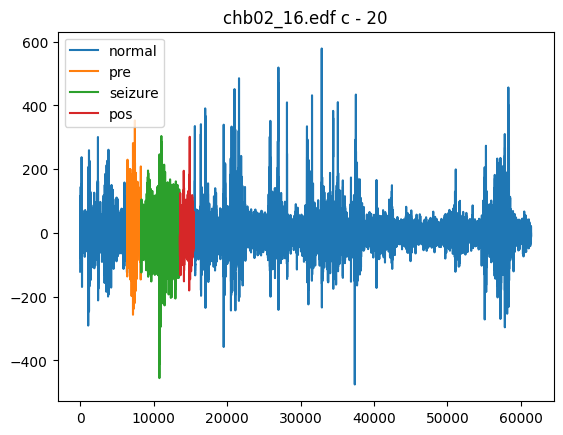

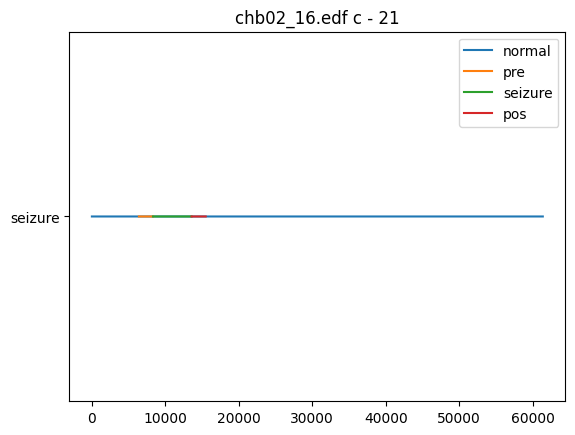

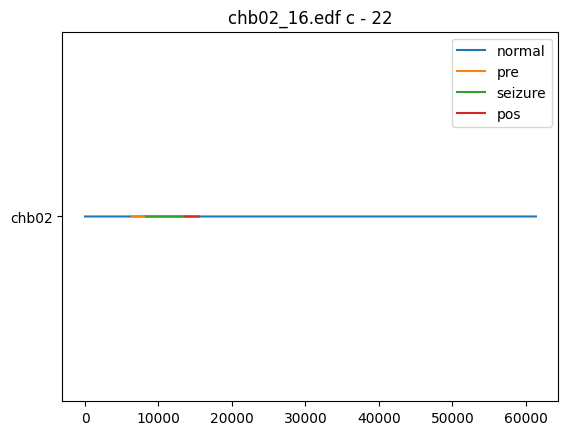

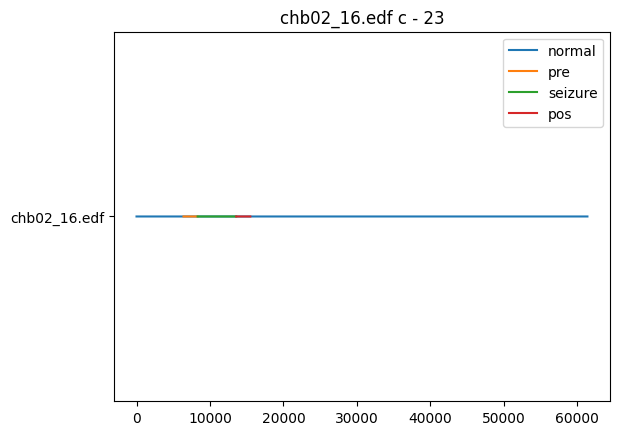

In [267]:
for channel in range(24):
    T = data.query(f"filename == '{Ref[ind]}'").iloc[:,channel]
    Types = y[ind]
    xrange = np.arange(0,T.shape[0], 1)
    for Type in np.unique(Types):
        mask = y[ind] == Type
        plt.plot(xrange[mask] ,T[mask], label = f'{retrieve[Type]}')
    plt.legend()
    plt.title(f"{Ref[ind]} c - {channel}")
    plt.show()

In [195]:
retrieve = {0:'normal', 1:'pre', 2:'seizure', 3:'pos'}

In [225]:
xrange

array([], dtype=int32)